# Relative correlation length

How to derive a relative correlation length based on the topography gradients

In [1]:
using DIVAnd
using PyPlot
using Dates
using Statistics

In [2]:
dx = dy = 0.1
lonr = 2.5:dx:12.
latr = 42.3:dy:44.6

42.3:0.1:44.6

In [4]:
# https://b2drop.eudat.eu/s/ACcxUEZZi6a4ziR/download  gebco_30sec_4.nc
# https://b2drop.eudat.eu/s/x83MSV8yUF934bL/download  gebco_30sec_8.nc
# https://b2drop.eudat.eu/s/o0vinoQutAC7eb0/download  gebco_30sec_16.nc

bathname = "data/gebco_30sec_4.nc"

if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/ACcxUEZZi6a4ziR/download",bathname)
else
    @info("Bathymetry file already downloaded")
end

bathisglobal = true

┌ Info: Bathymetry file already downloaded
└ @ Main In[4]:10


true

Read bathymetry and create mask

In [6]:
bx,by,b = DIVAnd.load_bath(bathname,true,lonr,latr)

mask = b .< 0
b[b .< 0] .= 0;

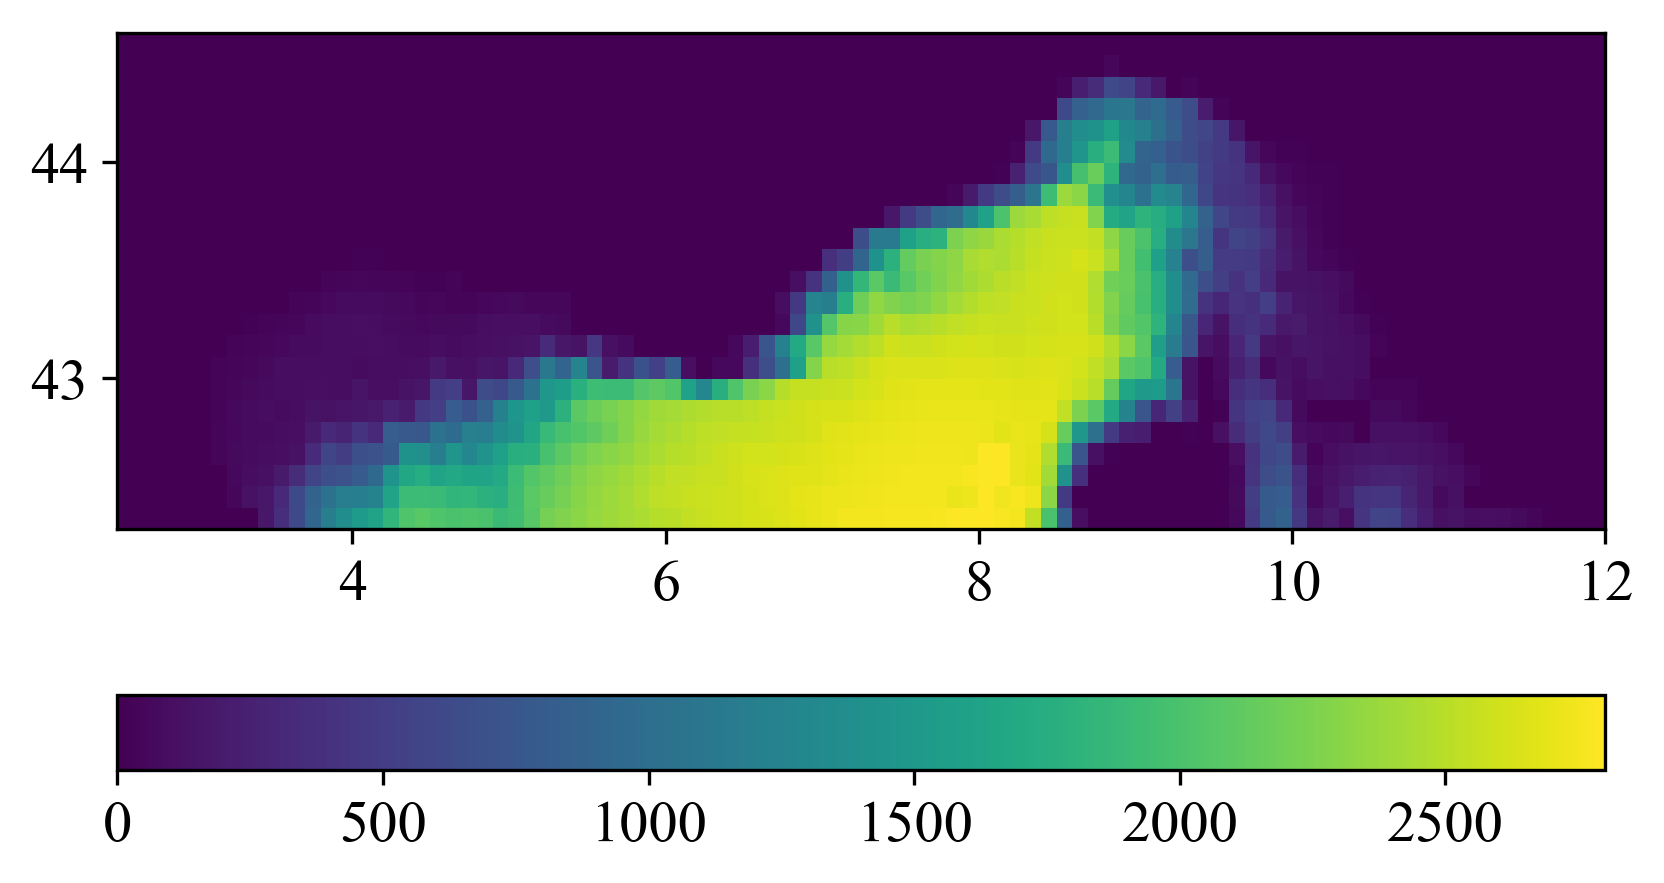

PyObject <matplotlib.colorbar.Colorbar object at 0x7f01a4eb30b8>

In [8]:
pcolor(bx,by,permutedims(b, [2,1]));  
gca()[:set_aspect](1/cos(mean([ylim()...]) * pi/180))
colorbar(orientation="horizontal")

In [9]:
x,y = DIVAnd.ndgrid(bx,by);
pm,pn = DIVAnd.DIVAnd_metric(x,y)

L = 10_000 # meters

RL = DIVAnd.lengraddepth((pm,pn),b, L);

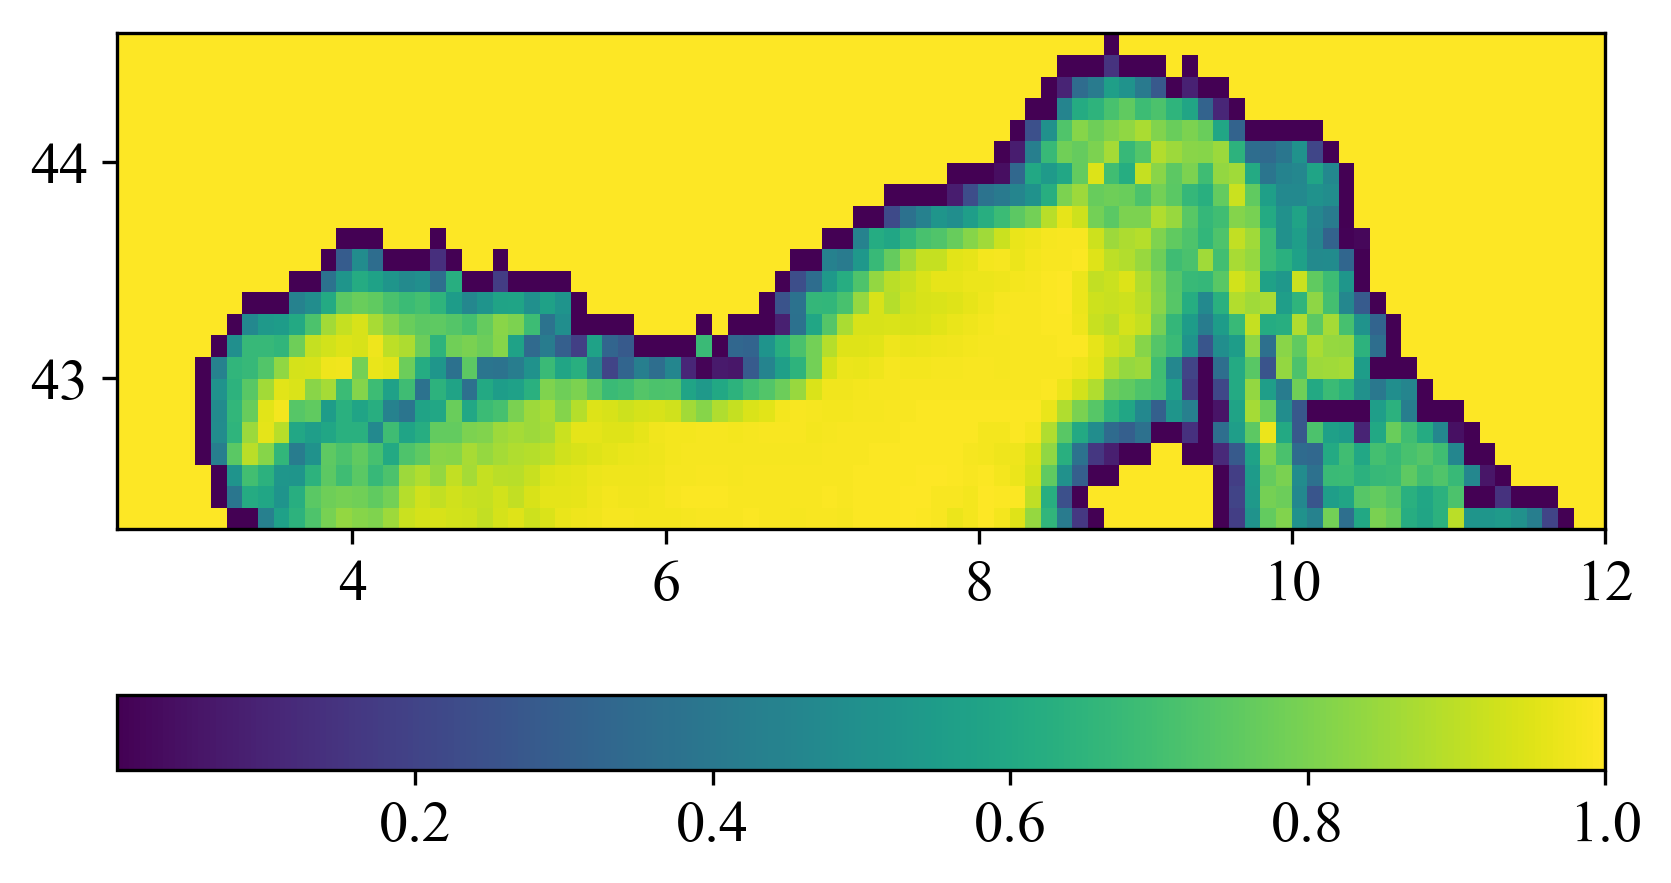

PyObject <matplotlib.colorbar.Colorbar object at 0x7f01a4cf7400>

In [10]:
pcolor(bx,by,permutedims(RL, [2,1])); 
gca()[:set_aspect](1/cos(mean([ylim()...]) * pi/180))
colorbar(orientation="horizontal")

In [12]:
depthr = [0.,10.,20.]
length(depthr)
RL3D = repeat(RL,inner=(1,1,length(depthr)))
@show size(RL3D)

size(RL3D) = (96, 24, 3)


(96, 24, 3)

Parameter `len` for diva3d is then:

In [13]:
len = (RL3D,RL3D,RL3D);

if the option `fitcorrlen` is true, internally diva3d will multiply the relative correlation length with the result of `fithorzcorr` and `fithvertcorr`. If fitting is not activated you have to multiply yourself the relative length scales by appropriate values